## Support Vector Machine

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.shape

(150, 5)

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='species'>

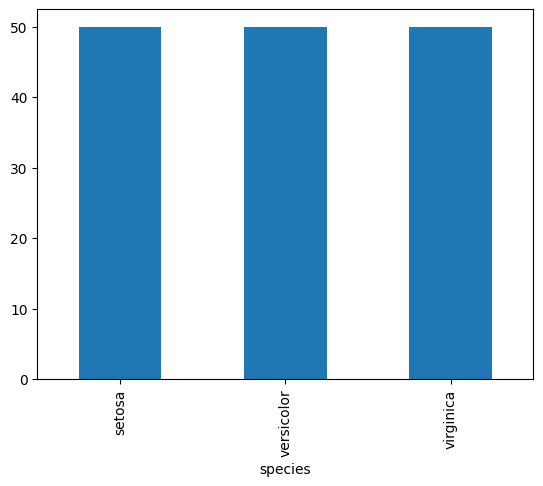

In [5]:
df['species'].value_counts().plot(kind='bar')

Separate X and Y

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

## Create a SVM Model

In [15]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(xtrain, ytrain)


SVC(probability=True)

In [16]:
model.score(xtrain, ytrain)

0.97

In [17]:
model.score(xtest, ytest)

0.92

In [18]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [19]:
ypred_tr[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [20]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [21]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [22]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


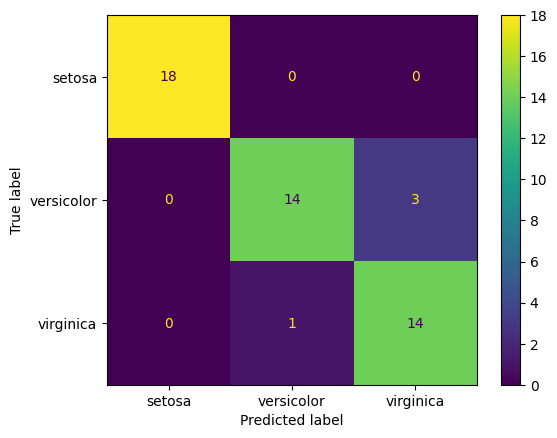

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.82      0.87        17
   virginica       0.82      0.93      0.87        15

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



Model has good F1 Score of 92% which means it is a good model

Predicting out of sample data

In [25]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [26]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


Predict the results with Probablity

In [27]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [28]:
probs = model.predict_proba(xnew_pre)
probs

array([[0.00937242, 0.94326249, 0.04736509],
       [0.01088459, 0.01176351, 0.97735189],
       [0.02526679, 0.95402985, 0.02070336],
       [0.62240307, 0.28047992, 0.09711702],
       [0.01465298, 0.25297828, 0.73236875],
       [0.94731038, 0.03081855, 0.02187106],
       [0.04048676, 0.94866256, 0.01085068],
       [0.01022079, 0.0271749 , 0.9626043 ],
       [0.95122531, 0.02824827, 0.02052642],
       [0.76212927, 0.17910118, 0.05876956],
       [0.0125768 , 0.97684549, 0.01057771],
       [0.01440111, 0.96273783, 0.02286106],
       [0.01517534, 0.01188937, 0.97293528],
       [0.01804965, 0.72284624, 0.25910412],
       [0.01887298, 0.16765527, 0.81347175]])

In [29]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
import numpy as np
max_prob = np.max(probs, axis=1)

In [31]:
max_prob

array([0.94326249, 0.97735189, 0.95402985, 0.62240307, 0.73236875,
       0.94731038, 0.94866256, 0.9626043 , 0.95122531, 0.76212927,
       0.97684549, 0.96273783, 0.97293528, 0.72284624, 0.81347175])

In [32]:
xnew['species_pred'] = preds
xnew['prob'] = max_prob

In [33]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.943262
1,6.9,3.1,5.1,2.3,virginica,0.977352
2,5.1,2.5,3.0,1.1,versicolor,0.954030
3,4.4,2.9,NaN,0.2,setosa,0.622403
4,5.9,3.0,5.1,1.8,virginica,0.732369
5,5.5,3.5,1.3,0.2,setosa,0.947310
6,5.6,NaN,3.6,1.3,versicolor,0.948663
7,6.5,3.0,5.2,2.0,virginica,0.962604
8,5.3,3.7,1.5,0.2,setosa,0.951225
9,5.1,3.4,1.5,NaN,setosa,0.762129


Save above results

In [34]:
xnew.to_csv('SVM_results', index=False)